# User Overview Analysis

In [1]:
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

# import sys
# import os
# sys.path.append(os.path.abspath('../scripts'))

In [2]:
from script.user_overview_analyzer import OverviewAnalyser

In [3]:
#acces the data loaded from database
import pickle
with open('variable.pickle','rb') as file:
    xdr_data= pickle.load(file)

### Check missing values

In [4]:
analyzer=OverviewAnalyser()

In [5]:
analyzer.missing_value(xdr_data)

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Drop columns that have null value more than half of the whole data

In [6]:
xdr_data= xdr_data.drop(columns=['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B',])

### Replace outlier values of numeric colums with mean value using z-scores except  'Bearer Id','IMSI','MSISDN/Number' and'IMEI' columns since they are Id's

In [7]:
analyzer.replace_outliers_with_mean(xdr_data)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,98618.088994,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,98618.088994,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,98618.088994,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,98618.088994,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,98618.088994,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.000000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


### Replace the missing values with mean or mode based on their data type

In [21]:
xdr_data= analyzer.replace_missing_with_mean_or_mode(xdr_data)

### Top 10 handsets used by the customers.

In [9]:
analyzer.rank(xdr_data,'Handset Type',10)

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: count, dtype: int64

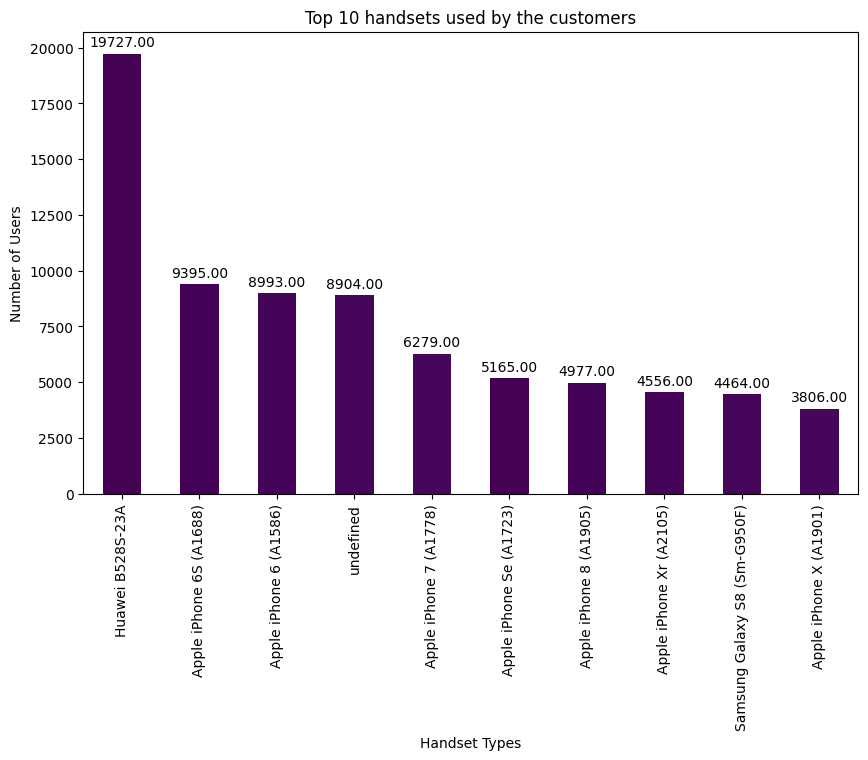

In [10]:
#plot of Top 10 handsets used by the customers
analyzer.rank_bar_plot(xdr_data,'Handset Type','Top 10 handsets used by the customers','Handset Types','Number of Users',10)

### Top 3 handset manufacturers

In [11]:
analyzer.rank(xdr_data,'Handset Manufacturer',3)

Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64

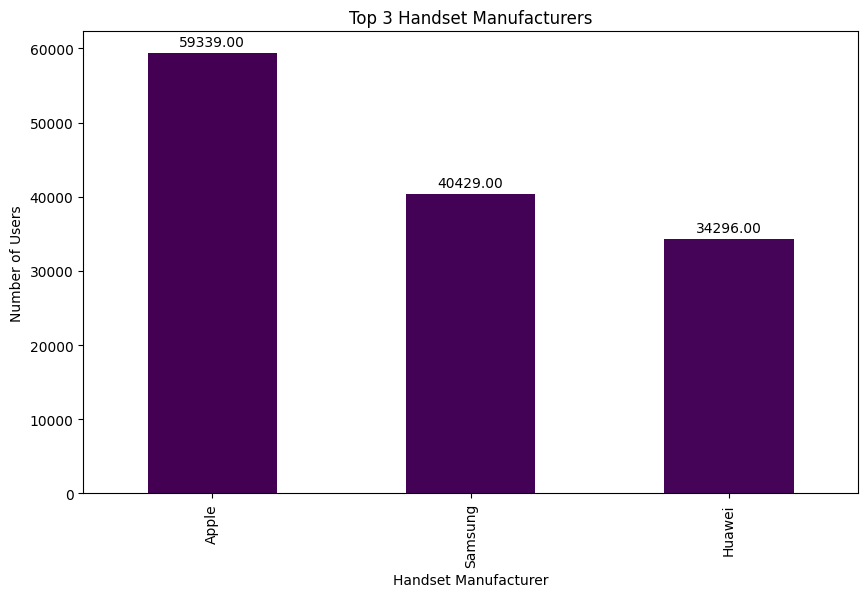

In [12]:
#plot of Top 3 handset manufacturers
analyzer.rank_bar_plot(xdr_data,'Handset Manufacturer','Top 3 Handset Manufacturers','Handset Manufacturer','Number of Users',3)

### Top 5 handsets per top 3 handset manufacturer

In [13]:
analyzer.top_handsets_by_manufacturer(xdr_data)

,Handset Manufacturer,Handset Type,count
60,Apple,Apple iPhone 6S (A1688),9395
56,Apple,Apple iPhone 6 (A1586),8993
66,Apple,Apple iPhone 7 (A1778),6279
80,Apple,Apple iPhone Se (A1723),5165
73,Apple,Apple iPhone 8 (A1905),4977
315,Huawei,Huawei B528S-23A,19727
336,Huawei,Huawei E5180,2074
413,Huawei,Huawei P20 Lite Huawei Nova 3E,2012
412,Huawei,Huawei P20,1475
453,Huawei,Huawei Y6 2018,996


### Aggregiate Per User
**Grouping Users by 'IMSI' since it is unique for each user**

In [14]:
aggregated_xdr_data= analyzer.aggregate_xdr_data(xdr_data)
aggregated_xdr_data

,MSISDN/Number,num_sessions,total_duration,total_dl_data,total_ul_data,social_media_dl,social_media_ul,google_dl,google_ul,email_dl,email_ul,youtube_dl,youtube_ul,netflix_dl,netflix_ul,gaming_dl,gaming_ul,other_dl,other_ul
0,3.360100e+10,1,116720.000000,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
1,3.360100e+10,1,181230.000000,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
2,3.360100e+10,1,134969.000000,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3,3.360101e+10,1,49878.000000,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
4,3.360101e+10,2,37104.000000,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106466,3.379000e+10,1,8810.000000,6.879252e+08,26716429.0,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0
106467,3.379000e+10,1,140988.000000,4.445751e+08,35732243.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0
106468,3.197021e+12,1,98618.088994,1.948281e+08,37295915.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0
106469,3.370000e+14,1,253030.000000,5.396350e+08,56652839.0,496337.0,25229.0,8215537.0,1615080.0,2989663.0,328919.0,16690728.0,20044212.0,9983678.0,20921364.0,5.012590e+08,8883653.0,144354057.0,4834382.0


### Variable transformations - segment the user based on total duration of session and compute the total data (DL+UL) per decile class

In [15]:
decile_data=analyzer.segment_and_aggregate(xdr_data)
print(decile_data)

   Decile  Total Data (Bytes)
0       1        5.425234e+12
1       2        6.103817e+12
2       3        6.463459e+12
3       4        5.927026e+12
4       5        5.189677e+12
5       6        6.417272e+12
6       7        6.086905e+12
7       8        7.709944e+12
8       9        9.173891e+12
9      10        1.512955e+13


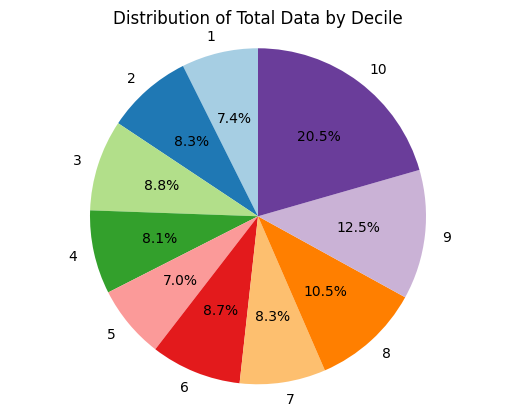

In [16]:
#pie char plot of decile_data
analyzer.decile_pie_chart(decile_data)

### Descriptive statistics
**descriptive ststistics excluding some of the columns**

In [17]:
exclude_columns = ['Bearer Id','Start ms','End ms','IMSI', 'MSISDN/Number', 'IMEI','Handset Type','Handset Manufacturer','Last Location Name']
analyzer.summary_statistics_excluding_columns(xdr_data,exclude_columns)

,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,...,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,99058.741054,78.317083,12.866779,11255.791034,1131.787278,93.737450,2.417823,1.283383,1.023845,98.824031,...,1.163387e+07,1.100857e+07,1.162724e+07,1.100190e+07,4.220642e+08,8.289600e+06,4.211525e+08,8.262685e+06,4.111913e+07,4.546640e+08
std,59953.227871,119.566520,19.184196,18857.655723,2454.538111,10.985638,4.408144,2.678624,2.566583,2.645180,...,6.711236e+06,6.345625e+06,6.724994e+06,6.357930e+06,2.440043e+08,4.781967e+06,2.431639e+08,4.768806e+06,1.125824e+07,2.441791e+08
min,7142.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.000000,0.000000,0.000000,73.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.324119e+06,7.114041e+06
25%,58248.750000,35.000000,3.000000,43.000000,47.000000,92.000000,0.000000,0.000000,0.000000,99.000000,...,5.833290e+06,5.515832e+06,5.778898e+06,5.476774e+06,2.104765e+08,4.130680e+06,2.103042e+08,4.144179e+06,3.322307e+07,2.431263e+08
50%,86399.000000,54.000000,7.000000,63.000000,62.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,1.161596e+07,1.101232e+07,1.164238e+07,1.099937e+07,4.234669e+08,8.291650e+06,4.218618e+08,8.266016e+06,4.113535e+07,4.559408e+08
75%,128420.750000,78.317083,12.866779,16872.500000,1116.000000,100.000000,3.000000,1.000000,1.000000,100.000000,...,1.744639e+07,1.651456e+07,1.747092e+07,1.650285e+07,6.332750e+08,1.243226e+07,6.316338e+08,1.238049e+07,4.902419e+07,6.657542e+08
max,347699.000000,1769.000000,244.000000,85214.000000,15639.000000,100.000000,21.000000,14.000000,16.000000,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.483343e+07,9.029696e+08


### Bivariant Analysis

Correlation Matrix:
total_data            1.000000
social_media_total    0.624423
google_total          0.682131
email_total           0.664136
youtube_total         0.705354
netflix_total         0.705281
gaming_total          0.997003
other_total           0.619388
Name: total_data, dtype: float64


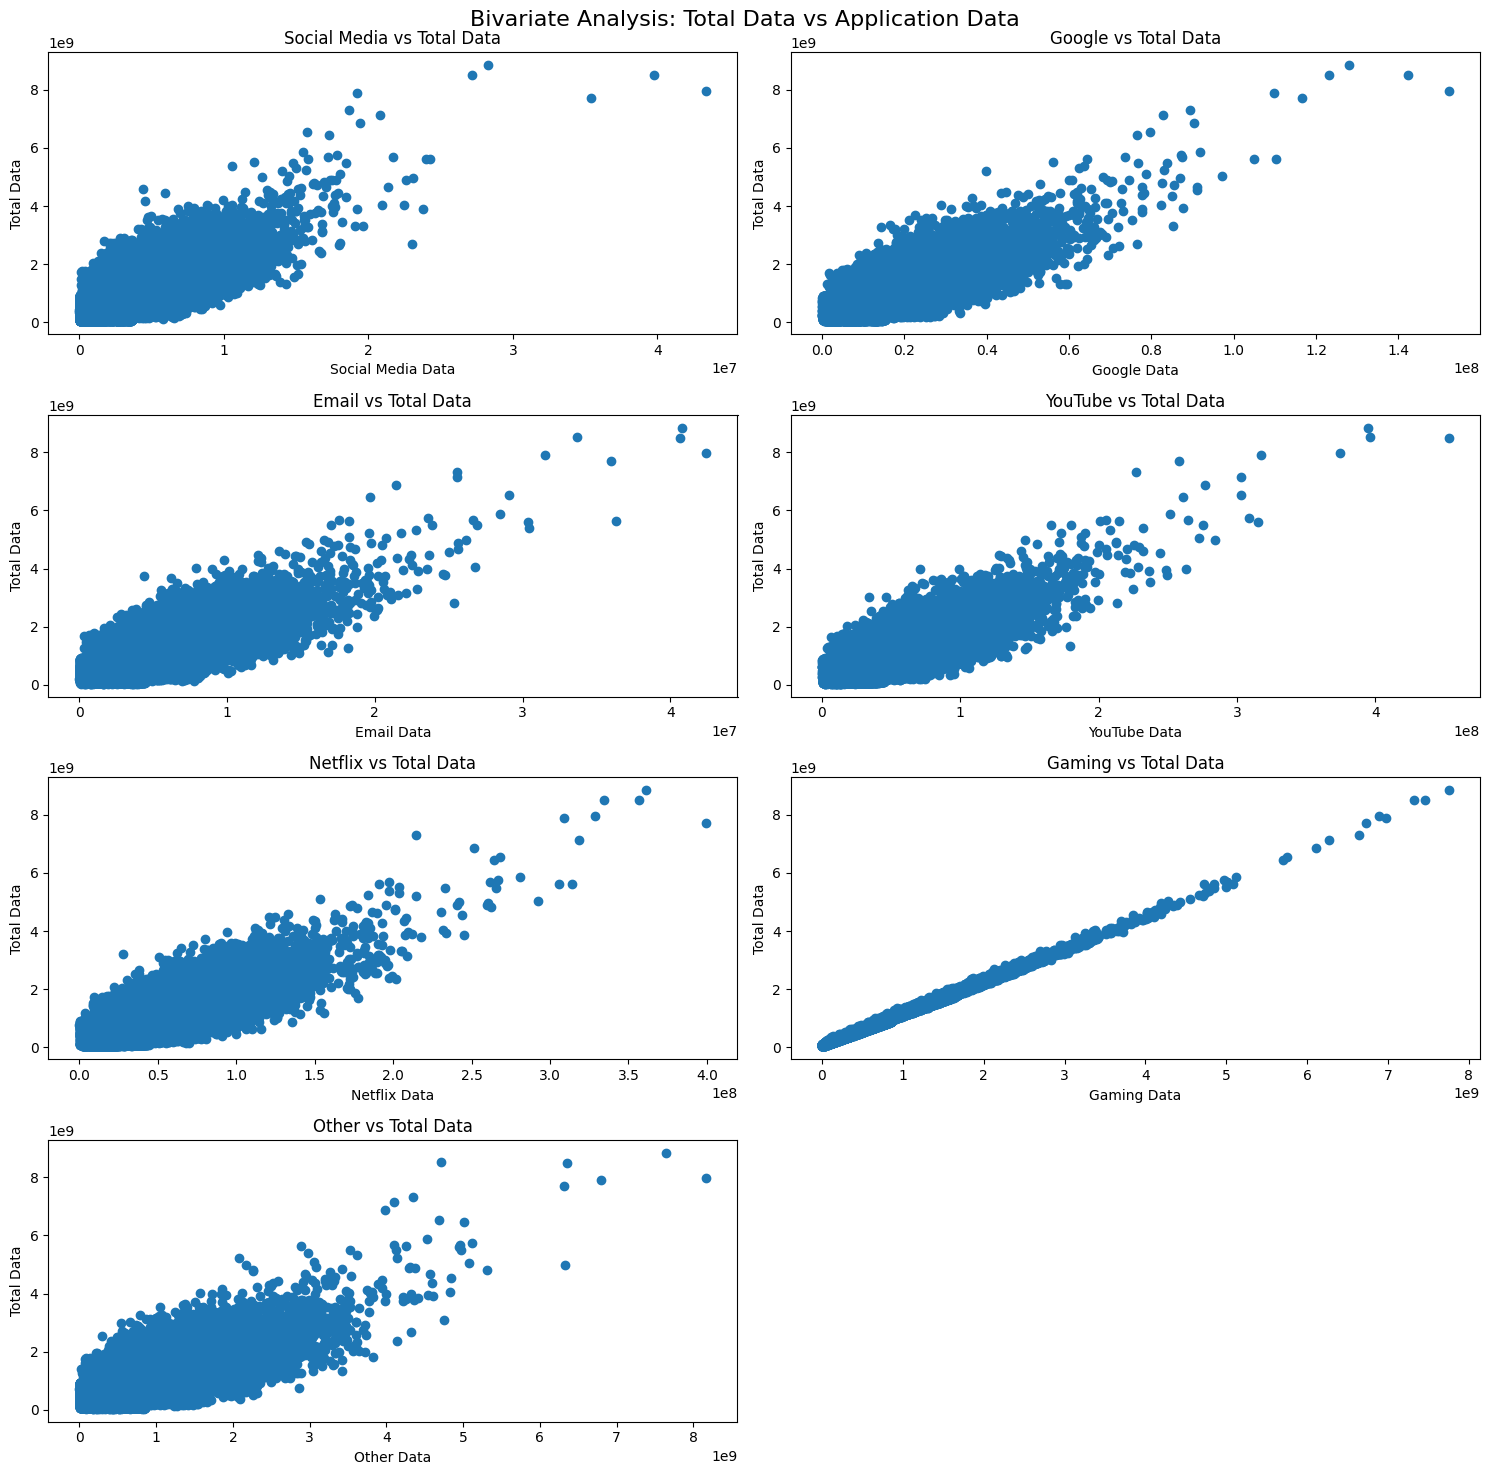

In [18]:
analyzer.bivariate_analysis(aggregated_xdr_data)

### Correlation Analysis

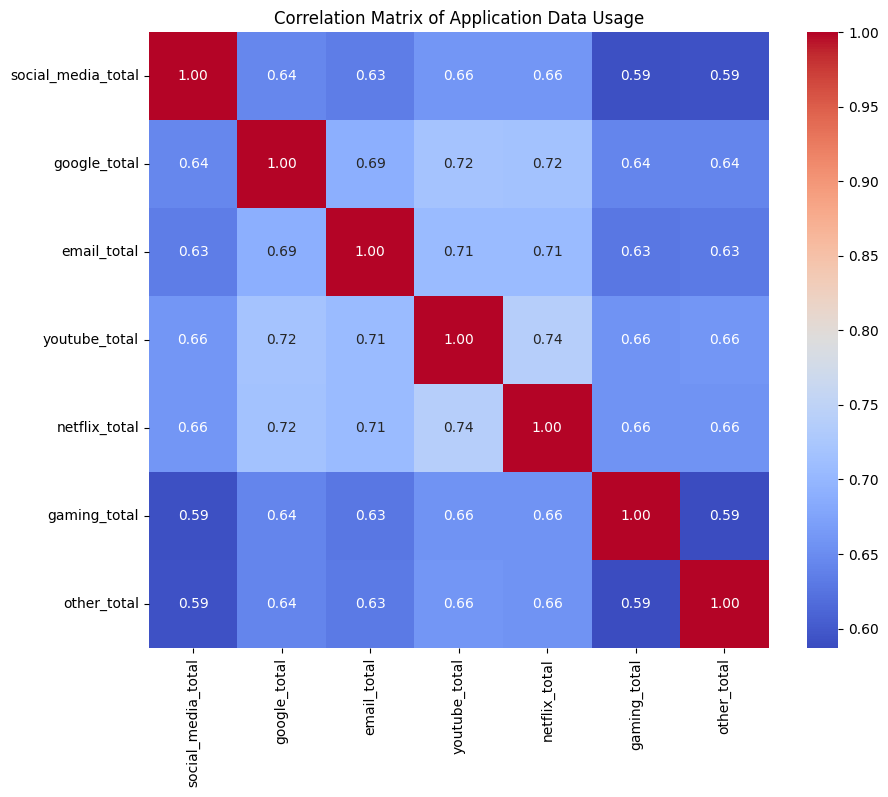

,social_media_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total
social_media_total,1.000000,0.643505,0.634498,0.659871,0.660356,0.590531,0.592088
google_total,0.643505,1.000000,0.688822,0.718962,0.716565,0.642442,0.643191
email_total,0.634498,0.688822,1.000000,0.705034,0.705898,0.627846,0.631448
youtube_total,0.659871,0.718962,0.705034,1.000000,0.738730,0.657735,0.660772
netflix_total,0.660356,0.716565,0.705898,0.738730,1.000000,0.657669,0.656256
gaming_total,0.590531,0.642442,0.627846,0.657735,0.657669,1.000000,0.586746
other_total,0.592088,0.643191,0.631448,0.660772,0.656256,0.586746,1.000000


In [19]:
analyzer.correlation_matrix(aggregated_xdr_data)

### Dimensionality Reduction

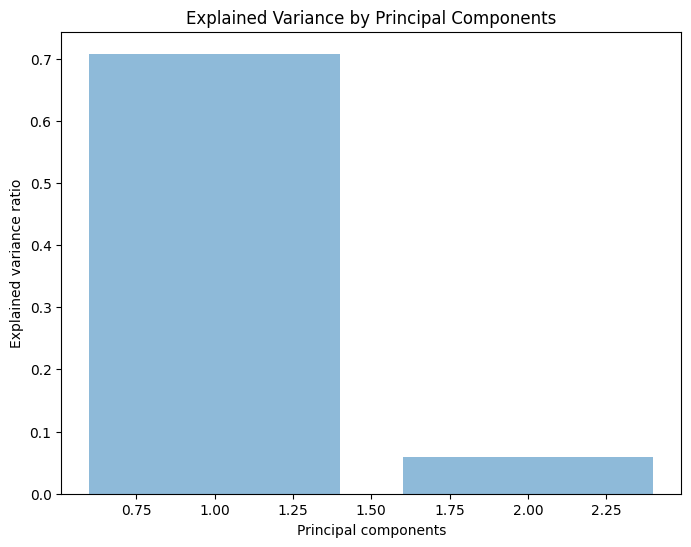

In [20]:
pca_df, explained_variance = analyzer.perform_pca(aggregated_xdr_data)

### store cleaned data and aggregate data to Postgres Database for later use 

In [22]:
from script.connection import Connector

In [25]:
# instance of the class
connector=Connector()

In [26]:
connector.add_dataframe_to_table(xdr_data, 'xdr_data_cleaned', if_exists='replace')
connector.add_dataframe_to_table(aggregated_xdr_data, 'aggregated_xdr_data', if_exists='replace')

DataFrame successfully added to table 'xdr_data_cleaned' in the database.
SQLAlchemy engine is disposed.
DataFrame successfully added to table 'aggregated_xdr_data' in the database.
SQLAlchemy engine is disposed.
